In [616]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Dropout, Flatten, Lambda
from tensorflow.keras import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [617]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
print('TF version:', tf.__version__)
print('TFP version:', tfp.__version__)

TF version: 2.11.0
TFP version: 0.16.0


In [618]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

In [619]:
from sklearn.preprocessing import MinMaxScaler
def scale_data(X):
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
    return X_scaled

In [620]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

def remove_close_points(df, lower_bound, upper_bound):
    """
    Remove points from the DataFrame df if their Euclidean distance is smaller than epsilon.

    Parameters:
    - df: DataFrame, input data
    - epsilon: float, threshold for removing points

    Returns:
    - DataFrame, modified DataFrame with close points removed
    """
    distances = cdist(df.values, df.values)
    np.fill_diagonal(distances, np.inf)
    distances[np.triu_indices(distances.shape[0], k=1)] = np.inf
   
    # Find indices of points to remove
    indices_to_remove = np.where(np.any(distances <lower_bound, axis=1))[0]
    new_indices = np.where(np.any((distances > upper_bound) & (distances != np.inf), axis=1))[0]
    indices_to_remove = np.concatenate((indices_to_remove, new_indices))
    # Create a mask for filtering
    modified_df = df.drop(index=indices_to_remove)
    return modified_df


In [621]:
def get_random_data(num):
    np.random.seed(111)
    set1 = np.random.normal(loc=1, scale=1, size=(num, 2))
    set2 = np.random.normal(loc=2.5, scale=1, size=(num, 2))
    X = np.concatenate([set1, set2])
    y = np.concatenate([np.zeros(num), np.ones(num)])
    y = y.astype(int)

    # Convert NumPy arrays to DataFrame and Series
    X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
    y_series = pd.Series(y, name='Target')

    return X_df, y_series

In [622]:

def get_bank_customer_churn_dataset():
    df = pd.read_csv('/Users/amirasrzad/Library/CloudStorage/OneDrive-UMassLowell/1-Research/1-Li/ICIS2023/datasets/Bank_Customer_Churn.csv')
    categorical_cols = ['country', 'gender']
    numerical_cols = ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    df_encoded = df_encoded.reset_index(drop=True)
    X = df_encoded.drop(["churn", 'customer_id'], axis = 1)
    X = scale_data(X)
    y = df_encoded['churn']
    return X, y

In [623]:

def get_diabetes_dataset():
    df = pd.read_csv('/Users/amirasrzad/Library/CloudStorage/OneDrive-UMassLowell/1-Research/1-Li/ICIS2023/experiment-results/pathdataset/diabetes.csv')
    X = df.drop('Outcome', axis='columns')
    X = scale_data(X)
    y = df['Outcome']
    return X, y

In [624]:
def get_breast_cancer_dataset():
    df = pd.read_csv('/Users/amirasrzad/Library/CloudStorage/OneDrive-UMassLowell/1-Research/1-Li/ICIS2023/datasets/breast-cancer.csv')
    X = df.drop(["diagnosis", 'id'], axis = 1)
    X = scale_data(X)
    y = df['diagnosis']
    y = y.replace({'B': 0, 'M': 1})
    return X, y

In [625]:
def get_boston_housing():
    rawdf = pd.read_csv('/Users/amirasrzad/Desktop/uni/term-1/Data Analytics/Assignment-2/BostonHousing2 - FullData.csv')
    X = rawdf.drop('CATMEDV', axis='columns')
    df_one = pd.get_dummies(rawdf["CATMEDV"])
    df_two = pd.concat((df_one, rawdf), axis=1)
    y = df_two['high']
    #X = scale_data(X)
    return X, y

In [626]:
def get_fico_dataset():
    df = pd.read_csv('/Users/amirasrzad/Library/CloudStorage/OneDrive-UMassLowell/1-Research/1-Li/ICIS2023/experiment-results/pathdataset/fico.csv')
    df.drop_duplicates(inplace=True)
    df['RiskPerformance'] = df['RiskPerformance'].replace({'Bad': 0, 'Good': 1})
    #modified_df = remove_close_points(df,3,820)
    df = df.reset_index(drop=True)
    X = df.drop('RiskPerformance', axis='columns')
    X = scale_data(X)
    y = df['RiskPerformance']
    return X, y

In [627]:

def get_bank_dataset():
    df = pd.read_csv('/Users/amirasrzad/Library/CloudStorage/OneDrive-UMassLowell/1-Research/1-Li/ICIS2023/datasets/bank.csv')
    df = df.dropna()
    df.drop_duplicates(inplace=True)
    df_sampled = df.sample(frac=0.15, replace=False, random_state=60)
    df_sampled = df_sampled.reset_index(drop=True)
    X = df_sampled.drop('give_credit', axis='columns')
    X = scale_data(X)
    y = df_sampled['give_credit']
    return X, y


In [628]:
def define():
    model = Sequential()
    model.add(Dense(32, activation="relu",input_shape=(input_shape, )))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    optim = tf.keras.optimizers.Adam(1e-3)
    model.compile(optimizer=optim, metrics=['accuracy'], loss=SparseCategoricalCrossentropy())
    return model

In [629]:
def train(x, y, model, epochs=5):
    model.fit(x, y, 
              batch_size=32,
              epochs=epochs,
              verbose=0)
    return model

In [630]:
def train_models(model_list, X_train, y_train, epochs=5):
    trained_models = []
    for model in model_list:
        trained_model = train(X_train, y_train, model, epochs)
        trained_models.append(trained_model)
    return trained_models

In [631]:
def predict(models, x):
    yhat_arr = []
    for model in models:
        yhat = model(x, training=False)
        yhat_arr.append(yhat)

    yhat_arr = np.stack(yhat_arr, -1)
    probs = np.mean(yhat_arr, axis=-1)
    

    entropy = - 1.0 * np.sum(probs * np.log(probs + 1e-16), axis=-1)
    return probs, entropy,yhat_arr

In [632]:
from sklearn.model_selection import train_test_split
X, y = get_bank_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)
X_test_org_idxs = X_test.index
X_train = X_train.to_numpy().astype(np.float32)
y_train = y_train.to_numpy().astype(np.float32)
X_test = X_test.to_numpy().astype(np.float32)
y_test = y_test.to_numpy().astype(np.float32)
input_shape = X_train.shape[1]
input_shape

10

In [633]:
# Calculate negative outlier factor scores

from sklearn.neighbors import LocalOutlierFactor
# Calculate negative outlier factor scores for class 0
lof_model_class_0 = LocalOutlierFactor(n_neighbors=5, contamination=0.1)
lof_model_class_0.fit(X[y == 0])
lof_scores_class_0 = -1 * lof_model_class_0.negative_outlier_factor_

# Calculate negative outlier factor scores for class 1
lof_model_class_1 = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
lof_model_class_1.fit(X[y == 1])
lof_scores_class_1 = -1 * lof_model_class_1.negative_outlier_factor_

# Combine the outlier scores for both classes
combined_lof_scores = np.empty_like(y, dtype=float)
combined_lof_scores[y == 0] = lof_scores_class_0
combined_lof_scores[y == 1] = lof_scores_class_1
combined_lof_scores.shape
outliers_scores_x_test = [combined_lof_scores[i] for i in X_test_org_idxs]


In [634]:
num_models = 10  # Number of models in your list
model_list = [define() for _ in range(num_models)]

In [635]:
# Train the models
trained_models = train_models(model_list, X_train, y_train, epochs=5)

In [636]:
probs, entropy,yhat_arr = predict(trained_models, X_test)
probs_train, entropy_train ,yhat_arr_train = predict(trained_models, X_train)

In [637]:
def custom_brier_score(probs):
    
    predicted_labels = np.argmax(probs, axis=1)
    t0 = np.where(predicted_labels == 0, 1, 0)
    t1 = np.where(predicted_labels == 1, 1, 0)
    
    # Calculate Brier Score
    brier_scores = np.square(t0 - probs[:, 0]) + np.square(t1 - probs[:, 1])
    
    return brier_scores
brier_score = custom_brier_score (probs)

In [638]:
def kl_divergences (probs, yhat_arr):    
    probs_reshaped = probs[:, :, np.newaxis]
    probs_broadcasted = np.broadcast_to(probs_reshaped, yhat_arr.shape)
    kl_divergences = np.sum(np.where(yhat_arr != 0, yhat_arr * np.log(yhat_arr / probs_broadcasted), 0), axis=-1)
    kl_divergences_mean = np.mean(kl_divergences, axis=1, keepdims=True)
    return kl_divergences_mean
kl_divergences_mean = kl_divergences (probs, yhat_arr)
kl_divergences_mean = kl_divergences_mean.reshape(-1)

In [639]:
def variance_probs (yhat_arr):
    variance_values = np.var(yhat_arr, axis=-1)
    variance_values_sum = variance_values[:,-1]
    variance_values_sum
    return variance_values_sum
variance_values_sum = variance_probs (yhat_arr)

In [640]:
def total_entropy (probs):
    total_entropy = - 1.0 * np.sum(probs * np.log(probs + 1e-16), axis=-1)
    return total_entropy
total_entropy = total_entropy (probs)

In [641]:
def expected_entropy (yhat_arr):
    expected_entropy = - 1.0 * np.mean(np.sum(yhat_arr * np.log(yhat_arr + 1e-16), axis=-2), axis=-1)
    return expected_entropy
expected_entropy = expected_entropy (yhat_arr)
mutual_information = total_entropy - expected_entropy

In [642]:
expected_entropy.shape

(1803,)

In [643]:

def find_misclassified(probs, y_true):
    # Convert predicted probabilities to class labels (assuming binary classification)
    predicted_labels = np.argmax(probs, axis=1)

    # Compare predicted labels with true labels
    misclassified_indices = np.where(predicted_labels != y_true)[0]
    correct_classified_indices = np.where(predicted_labels == y_true)[0]
    return misclassified_indices,correct_classified_indices

# Example usage:
# Assuming y_test contains the true labels
misclassified_indices, correct_classified_indices = find_misclassified(probs, y_test)
misclassified_org_idx = [X_test_org_idxs[i] for i in misclassified_indices]
len(misclassified_indices)/len(X_test)

0.0632279534109817

In [644]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import random
#import pydotplus
import collections
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from scipy.spatial.distance import cdist, pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree, KNeighborsClassifier

In [645]:
class TrustScore:
    """
    Trust Score: a measure of classifier uncertainty based on nearest neighbors.
  """

    def __init__(self, k=10, alpha=0.0, filtering="none", min_dist=1e-12):
        """
        k and alpha are the tuning parameters for the filtering,
        filtering: method of filtering. option are "none", "density",
        "uncertainty"
        min_dist: some small number to mitigate possible division by 0.
    """
        self.k = k
        self.filtering = filtering
        self.alpha = alpha
        self.min_dist = min_dist

    def filter_by_density(self, X: np.array):
        """Filter out points with low kNN density.
    Args:
    X: an array of sample points.
    Returns:
    A subset of the array without points in the bottom alpha-fraction of
    original points of kNN density.
    """
        kdtree = KDTree(X)
        knn_radii = kdtree.query(X, k=self.k)[0][:, -1]
        eps = np.percentile(knn_radii, (1 - self.alpha) * 100)
        return X[np.where(knn_radii <= eps)[0], :]

    def filter_by_uncertainty(self, X: np.array, y: np.array):
        """Filter out points with high label disagreement amongst its kNN neighbors.
    Args:
    X: an array of sample points.
    Returns:
    A subset of the array without points in the bottom alpha-fraction of
    samples with highest disagreement amongst its k nearest neighbors.
    """
        neigh = KNeighborsClassifier(n_neighbors=self.k)
        neigh.fit(X, y)
        confidence = neigh.predict_proba(X)
        cutoff = np.percentile(confidence, self.alpha * 100)
        unfiltered_idxs = np.where(confidence >= cutoff)[0]
        return X[unfiltered_idxs, :], y[unfiltered_idxs]

    def fit(self, X: np.array, y: np.array):
        """Initialize trust score precomputations with training data.
    WARNING: assumes that the labels are 0-indexed (i.e.
    0, 1,..., n_labels-1).
    Args:
    X: an array of sample points.
    y: corresponding labels.
    """

        self.n_labels = np.max(y) + 1
        self.kdtrees = [None] * self.n_labels
        if self.filtering == "uncertainty":
            X_filtered, y_filtered = self.filter_by_uncertainty(X, y)
        for label in range(self.n_labels):
            if self.filtering == "none":
                X_to_use = X[np.where(y == label)[0]]
                self.kdtrees[label] = KDTree(X_to_use)
            elif self.filtering == "density":
                X_to_use = self.filter_by_density(X[np.where(y == label)[0]])
                self.kdtrees[label] = KDTree(X_to_use)
            elif self.filtering == "uncertainty":
                X_to_use = X_filtered[np.where(y_filtered == label)[0]]
                self.kdtrees[label] = KDTree(X_to_use)

            if len(X_to_use) == 0:
                print(
                    "Filtered too much or missing examples from a label! Please lower "
                    "alpha or check data."
                )

    def get_score(self, X: np.array, y_pred: np.array):
        """Compute the trust scores.
    Given a set of points, determines the distance to each class.
    Args:
    X: an array of sample points.
    y_pred: The predicted labels for these points.
    Returns:
    The trust score, which is ratio of distance to closest class that was not
    the predicted class to the distance to the predicted class.
    """
        d = np.tile(None, (X.shape[0], self.n_labels))
        for label_idx in range(self.n_labels):
            d[:, label_idx] = np.mean(self.kdtrees[label_idx].query(X, k=5)[0][:, -5:], axis=1)
            

        sorted_d = np.sort(d, axis=1)
        d_to_pred = d[range(d.shape[0]), y_pred]
        d_to_closest_not_pred = np.where(
            sorted_d[:, 0] != d_to_pred, sorted_d[:, 0], sorted_d[:, 1]
        )
        return d_to_closest_not_pred / (d_to_pred + self.min_dist)

In [646]:
ts = TrustScore(k=10, alpha=0.06, filtering="density")
predicted_labels_train = np.argmax(probs_train, axis=1)
y_train = y_train.astype(int)
ts.fit(X_train, y_train)
predicted_labels = np.argmax(probs, axis=1)
trust_scores = ts.get_score(X_test, predicted_labels)
trust_scores_x_test = [trust_scores[i] for i in range(len(X_test))]
#trust_scores[trust_scores > 5] = 5

In [647]:
pd.set_option('display.max_rows', None)

In [648]:
data = {'trust_score':trust_scores }
df = pd.DataFrame(data)
r_df = pd.DataFrame({'trust_score': df['trust_score'],
                          'misclassified': df.index.isin(misclassified_indices)})
#r_df[r_df['misclassified']== True]
#print neghbors trust?

In [649]:
misclassified_indices

array([   4,    9,   13,   19,   29,   39,   63,   64,   76,   91,  114,
        124,  149,  175,  184,  206,  229,  242,  244,  250,  272,  279,
        284,  319,  346,  347,  355,  358,  382,  390,  405,  412,  414,
        437,  472,  477,  490,  494,  505,  511,  571,  610,  617,  654,
        658,  661,  665,  690,  695,  727,  737,  760,  761,  771,  779,
        781,  800,  835,  837,  845,  859,  862,  872,  873,  915,  927,
        929,  945,  973,  989,  998, 1016, 1019, 1027, 1047, 1175, 1177,
       1183, 1193, 1198, 1199, 1225, 1259, 1291, 1293, 1320, 1339, 1353,
       1357, 1364, 1366, 1377, 1425, 1442, 1451, 1476, 1479, 1482, 1485,
       1512, 1578, 1580, 1588, 1594, 1619, 1640, 1669, 1678, 1721, 1733,
       1757, 1771, 1780, 1798])

In [650]:
def double_trust(trust_scores, X_test, predicted_labels):    
    # Choose the number of neighbors (k)
    k_neighbors = 5  # You can adjust this value

    # Build a KDTree using X_test
    kdtree = KDTree(X_test)

    # Find the indices and distances of the k-nearest neighbors for each point in X_test
    distances, indices = kdtree.query(X_test, k=k_neighbors)
    
    # Initialize an empty array to store the final k-th trust scores
    final_kth_trust_scores = np.zeros_like(trust_scores)

    # Loop through each point in X_test
    for i in range(len(X_test)):
        # Get the predicted label for the current point
        current_label = predicted_labels[i]
        # Get the indices of the k-nearest neighbors for the current point
        neighbors_indices = indices[i]
        
        kth_trust_score = 0  # Initialize kth_trust_score
        for j in neighbors_indices:
            
            if current_label == predicted_labels[j]:
                kth_trust_score += trust_scores[j]
                
            else:
                
                kth_trust_score -= trust_scores[j]

        # Calculate the mean trust scores for the k-nearest neighbors belonging to the predicted label
        kth_trust_score /= len(neighbors_indices)

        # Update the final k-th trust scores array
        final_kth_trust_scores[i] = kth_trust_score
    
    return final_kth_trust_scores

In [651]:
from scipy.spatial import KDTree
import numpy as np

def double_trust_2(trust_scores, X_test, predicted_labels):    
    # Choose the number of neighbors (k)
    k_neighbors = 3  # You can adjust this value

    # Build a KDTree using X_test
    kdtree = KDTree(X_test)

    # Find the indices and distances of the k-nearest neighbors for each point in X_test
    distances, indices = kdtree.query(X_test, k=k_neighbors)
    
    # Initialize an empty array to store the final k-th trust scores
    final_kth_trust_scores = np.zeros_like(trust_scores)

    # Loop through each point in X_test
    for i in range(len(X_test)):
        # Get the predicted label for the current point
        current_label = predicted_labels[i]
        # Get the indices of the k-nearest neighbors for the current point
        neighbors_indices = indices[i]
        same_class_count = np.sum(predicted_labels[neighbors_indices] == current_label)

        # Get the trust scores of the neighbors
        neighbors_trust_scores = trust_scores[neighbors_indices]
        neighbors_trust_scores = np.append(neighbors_trust_scores, trust_scores[i])
        
        # Get the indices that would sort the trust scores in ascending order
        sorted_indices = np.argsort(neighbors_trust_scores)
        
        # Find the rank of the current trust score among the neighbors
        current_rank = np.where(sorted_indices == 0)[0][0]

        # Augment the trust score based on the rank
        augmented_score = ((same_class_count/k_neighbors)**(k_neighbors))*(trust_scores[i]) ** (1+current_rank)
        #augmented_score = np.power(augmented_score, 1/5)
        # Update the final k-th trust scores array
        final_kth_trust_scores[i] = augmented_score
    
    return final_kth_trust_scores


In [652]:
from numpy import min, max
def min_max_scaler(data, min_val=0, max_val=1):  
  """Performs min-max scaling on a list or NumPy array."""
  data = np.asarray(data)  
  return (data - min(data)) / (max(data) - min(data)) * (max_val - min_val) + min_val

In [653]:
final_kth_trust_scores = double_trust_2(trust_scores, X_test, predicted_labels)
misclassified_double_trust = [final_kth_trust_scores[i] for i in misclassified_indices]

#scaled_misclassified_double_trust = min_max_scaler(misclassified_double_trust, min_val=0, max_val=10)

In [654]:
np.mean(misclassified_double_trust)


884.1980242046401

In [655]:
#misclassified_double_trust = [final_kth_trust_scores[i] for i in misclassified_indices]
correct_classified__double_trust =  [final_kth_trust_scores[i] for i in correct_classified_indices]
scaled_correct_double_trust = min_max_scaler(correct_classified__double_trust, min_val=0, max_val=10)
np.mean(correct_classified__double_trust)


907.6812550391015

In [656]:
double_trust_scores_x_test = [final_kth_trust_scores[i] for i in range(len(X_test))]

In [657]:
df_result = pd.DataFrame({
    'Epistemic': mutual_information,
    'Aleatoric': expected_entropy,
    'brier_score': brier_score,
    'trust_scores': trust_scores_x_test
    
}, index=X_test_org_idxs)
#df_result

In [658]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df_result.corr()

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("bank loan dataset")
plt.savefig('Correlation_bank.png', bbox_inches='tight', dpi=300)
plt.close()

In [48]:
outliers_scores_x_test
misclassified_outliers_scores = [outliers_scores_x_test[i] for i in misclassified_indices]

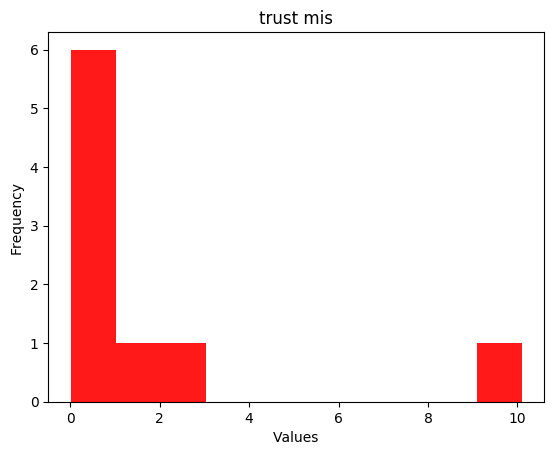

In [49]:
plt.hist(misclassified_double_trust, bins='auto', color='red', alpha=0.9)
plt.title('trust mis')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

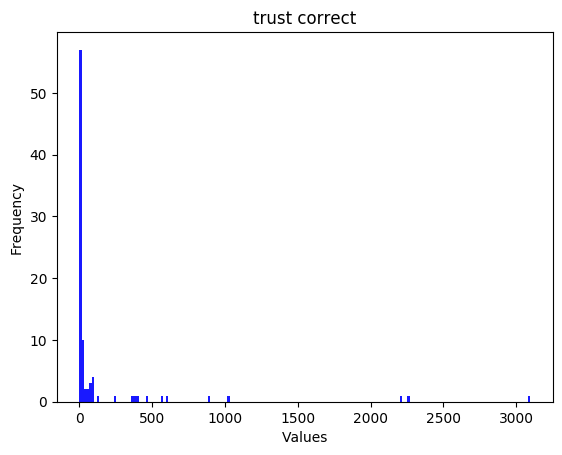

In [50]:
plt.hist(correct_classified__double_trust, bins='auto', color='blue', alpha=0.9)
plt.title('trust correct')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [50]:
misclassified_trust = [trust_scores[i] for i in misclassified_indices]
correct_classified_trust =  [trust_scores[i] for i in correct_classified_indices]

In [51]:
np.mean(misclassified_trust)

1.191766505748581

In [52]:
np.mean(correct_classified_trust)

2.1670401304449887

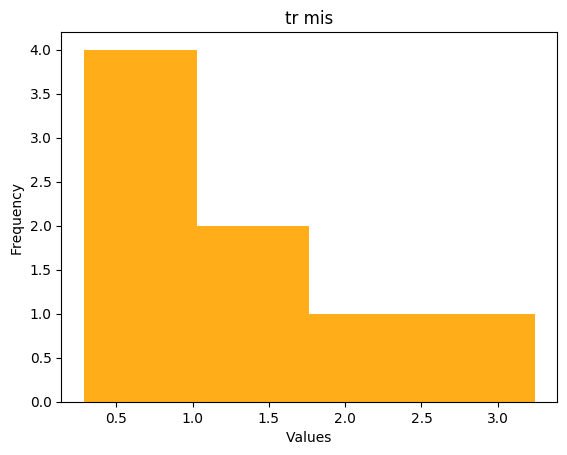

In [53]:
plt.hist(misclassified_trust, bins='auto', color='orange', alpha=0.9)
plt.title('tr mis')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

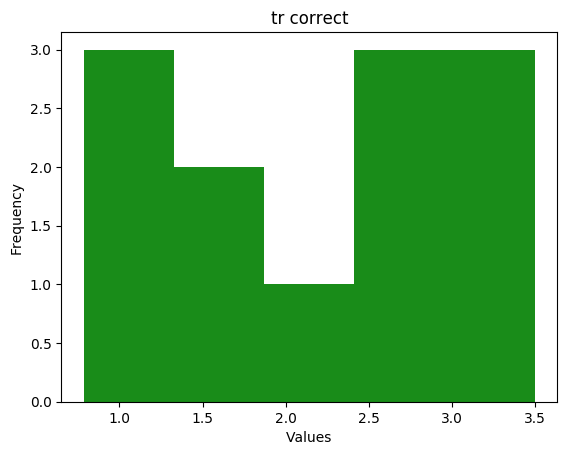

In [54]:
plt.hist(correct_classified_trust, bins='auto', color='green', alpha=0.9)
plt.title('tr correct')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [55]:
misclassified_brier_score = [brier_score[i] for i in misclassified_indices]
correct_classified_brier_score =  [brier_score[i] for i in correct_classified_indices]
misclassified_kl = [kl_divergences_mean[i] for i in misclassified_indices]
correct_classified_kl =  [kl_divergences_mean[i] for i in correct_classified_indices]
misclassified_var = [variance_values_sum[i] for i in misclassified_indices]
correct_classified_var =  [variance_values_sum[i] for i in correct_classified_indices]
misclassified_trust_scores = [trust_scores[i] for i in misclassified_indices]
correct_classified_trust_scores =  [trust_scores[i] for i in correct_classified_indices]

In [56]:
# Calculate mean for each vector
mean_misclassified_brier = np.mean(misclassified_brier_score)*100
mean_correct_classified_brier = np.mean(correct_classified_brier_score)*100
mean_misclassified_kl = np.mean(misclassified_kl)*10
mean_correct_classified_kl = np.mean(correct_classified_kl)*10
mean_misclassified_var = np.mean(misclassified_var)*100
mean_correct_classified_var = np.mean(correct_classified_var)*100
mean_misclassified_trust_scores = np.mean(misclassified_trust_scores)*1000
mean_correct_classified_trust_scores = np.mean(correct_classified_trust_scores)*1000

data = {
    'Brier Score': [mean_misclassified_brier, mean_correct_classified_brier],
    'KL Divergence': [mean_misclassified_kl, mean_correct_classified_kl],
    'Variance': [mean_misclassified_var, mean_correct_classified_var],
    'Trust Scores': [mean_misclassified_trust_scores, mean_correct_classified_trust_scores],
}

mean_df = pd.DataFrame(data, index=['Misclassified', 'Correct Classified'])

# Display the DataFrame

mean_df

,Brier Score,KL Divergence,Variance,Trust Scores
Misclassified,30.382926,0.090601,0.086672,1191.766506
Correct Classified,25.176447,0.179374,0.161764,2167.040130


In [57]:
import matplotlib.pyplot as plt

# Create a dictionary to map array names to indices
array_names = {
    'misclassified_brier_score': misclassified_brier_score,
    'correct_classified_brier_score': correct_classified_brier_score,
    'misclassified_kl': misclassified_kl,
    'correct_classified_kl': correct_classified_kl,
    'misclassified_var': misclassified_var,
    'correct_classified_var': correct_classified_var,
    'misclassified_trust_scores': misclassified_trust_scores,
    'correct_classified_trust_scores': correct_classified_trust_scores
}

colors = ['red', 'blue'] * 4  # Red for misclassified, blue for correct
i=0
for name, array in array_names.items():
    plt.hist(array, bins='auto', color=colors[i], alpha=0.9)
    i+=1
    plt.title(f'BANK {name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.savefig(f'bank_{name}.png')
    plt.close()


In [58]:


if __name__ == "__main__":
    # This block will only run if the module is executed directly
    print("This will only be executed when my_module is run directly.")

This will only be executed when my_module is run directly.
